In [83]:
from sklearn.datasets import load_wine
import pandas as pd
wine = load_wine()

# print(wine.data)
df = pd.DataFrame(wine.data, columns=wine.feature_names)

df = pd.concat([df, pd.DataFrame(wine.target, columns=["wine_class"])], axis="columns")
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [84]:
df["wine_class"].value_counts()

wine_class
1    71
0    59
2    48
Name: count, dtype: int64

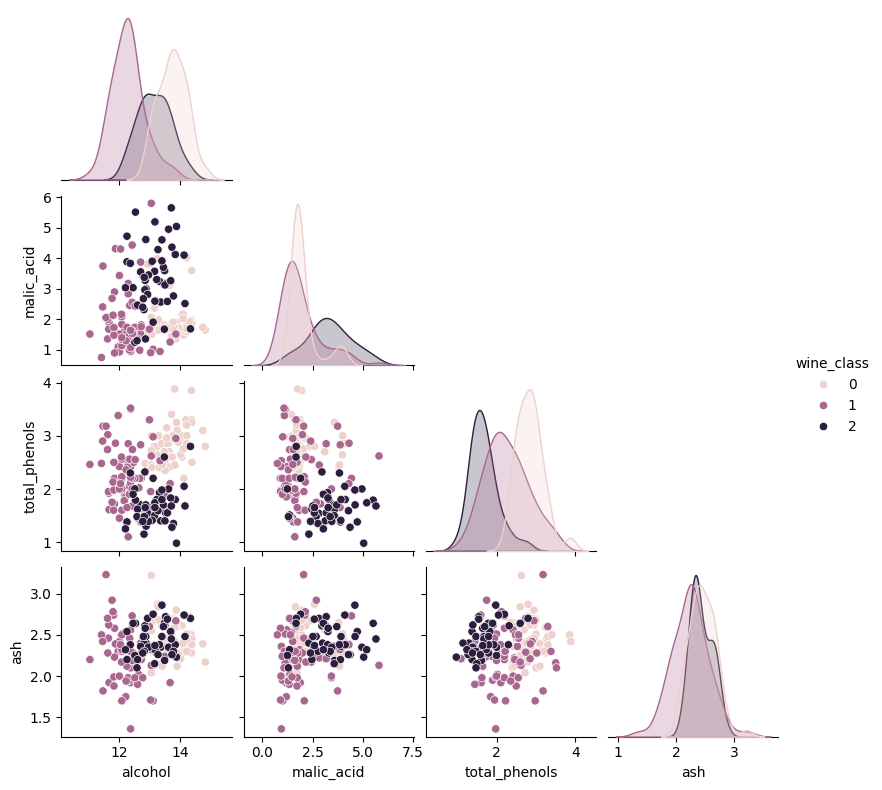

In [85]:
import seaborn as sns
sns.pairplot(data=df[["alcohol", "malic_acid", "total_phenols", "ash", "wine_class"]], hue="wine_class", corner=True, height=2)

<Axes: >

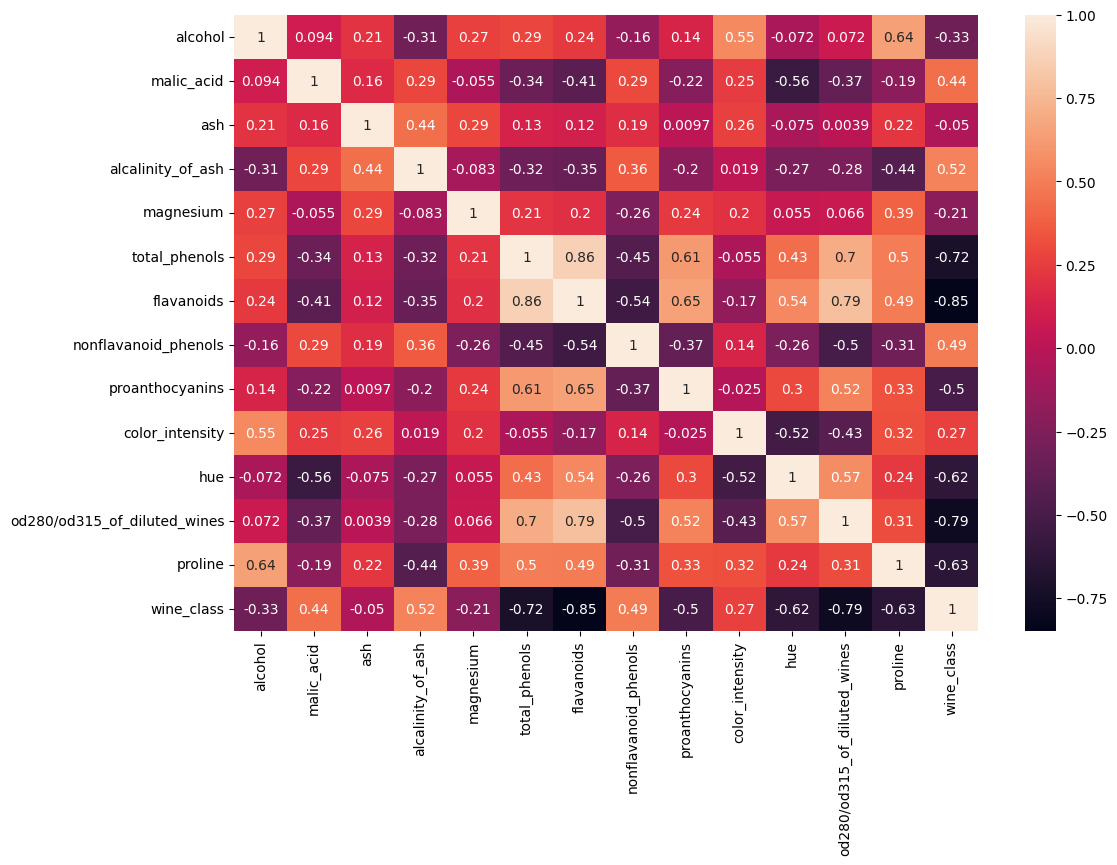

In [86]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [87]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# df_relevant = df["od2800/od315_of_diluted_wines"]

X, Y = df.drop(["wine_class"], axis="columns"), df["wine_class"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42) #random state endast av pedagogiska anledningar

scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model_KNN = KNeighborsClassifier(n_neighbors=1)

model_KNN.fit(scaled_X_train, Y_train)

Y_hat = model_KNN.predict(scaled_X_test)

Y_hat


array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 0, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 1, 0, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 1, 0, 0, 2,
       1])

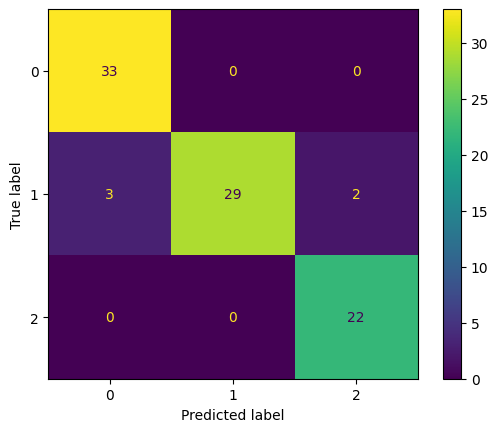

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

cm = confusion_matrix(Y_test, Y_hat)

ConfusionMatrixDisplay(cm).plot()

In [89]:
print(classification_report(Y_test, Y_hat))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.85      0.92        34
           2       0.92      1.00      0.96        22

    accuracy                           0.94        89
   macro avg       0.94      0.95      0.94        89
weighted avg       0.95      0.94      0.94        89



[Text(0.5, 1.0, 'Elbow plot'), Text(0.5, 0, 'k'), Text(0, 0.5, 'error')]

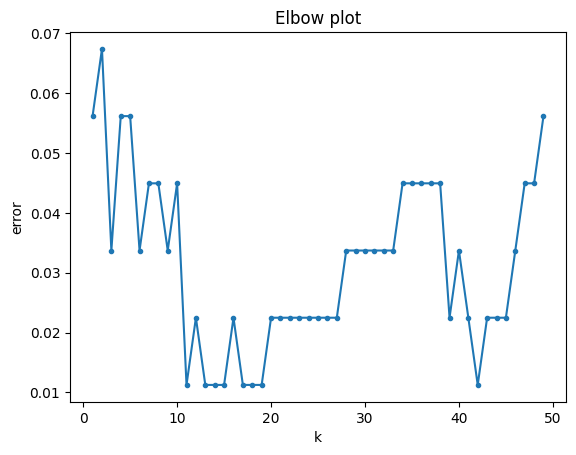

In [91]:
error = 1-accuracy_score(Y_test, Y_hat)
error_list = []

for k in range(1,50):
    model_KNN = KNeighborsClassifier(n_neighbors=k)
    model_KNN.fit(scaled_X_train, Y_train)
    Y_hat = model_KNN.predict(scaled_X_test)
    error_list.append(1-accuracy_score(Y_test, Y_hat))

fig, ax = plt.figure(), plt.axes()

ax.plot(range(1,len(error_list)+1), error_list, ".-")
ax.set(title="Elbow plot", xlabel="k", ylabel="error")

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.97      0.99        34
           2       1.00      1.00      1.00        22

    accuracy                           0.99        89
   macro avg       0.99      0.99      0.99        89
weighted avg       0.99      0.99      0.99        89



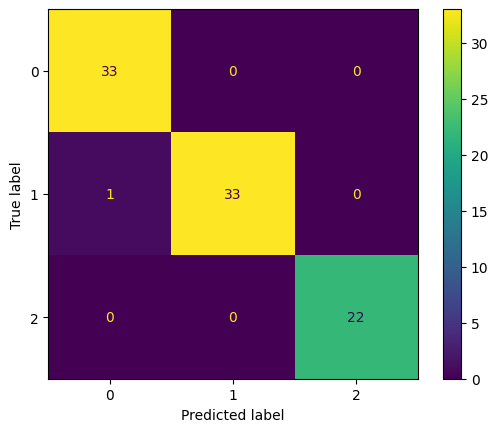

In [92]:
model_KNN = KNeighborsClassifier(n_neighbors=11)
model_KNN.fit(scaled_X_train, Y_train)
Y_hat = model_KNN.predict(scaled_X_test)

print(classification_report(Y_test, Y_hat))

cm = confusion_matrix(Y_test, Y_hat)
ConfusionMatrixDisplay(cm).plot()

In [90]:

# Drop ash because low correlation

# plt.subplots(figsize=(12,8))
# sns.heatmap(df.drop(columns=["ash"], axis="columns").corr(), annot=True)